In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import t
#import sympy as sym
from scipy.special import erf
plt.rcParams['font.family']='serif'

In [162]:
Npixeles=256
NI=1 #Número de imágenes RAW
NF=1 #Número de imágenes FF
NThr=1 #Número de imágenes contenidas dentro de cada .raw: La primera es la dada por el canal 0 y la segunda es la dada por el canal 1.
nameRAW="Spk_YES2R_Poly_09_d0.1m_a15um_p62um_step-4.2_dith23.25_"
nameFF="Spk_YES2FF_Poly_00_d0.1m_a15um_p62um_step-4.2_dith23.25_"

In [163]:
def ImagenesR(name,Npixeles):
    I=[]
    for k in range(0,len(name),Npixeles*Npixeles):
        Im=np.zeros((Npixeles,Npixeles))
        for j in range(Npixeles):
            for i in range(Npixeles):
                Im[j,i]=name[i+Npixeles*j+k]
        I.append(Im)
    return I
def Imagenes(name,Npixeles,NI):
    D=[]
    for i in range(1,NI+1):
        Raw=np.fromfile(name+"{}.raw".format(i), dtype='float32')
        K=ImagenesR(Raw,Npixeles)
        D.append(K)
    return D
def ImagenesA(name,Npixeles,NI,NThr):
    A=[]
    for i in range(NThr):
        Mean=np.zeros((Npixeles, Npixeles))
        for j in range (NI):
            Mean=Mean+name[j][i]
        A.append(Mean)
    return A
def CNR(meanS,meanB,stdB):
    CNR = (meanB - meanS)/stdB
    return CNR

In [164]:
RAW=Imagenes(nameRAW,Npixeles,NI)
RAWA=ImagenesA(RAW,Npixeles,NI,NThr)
FF=Imagenes(nameFF,Npixeles,NF)
FFA=ImagenesA(FF,Npixeles,NF,NThr)

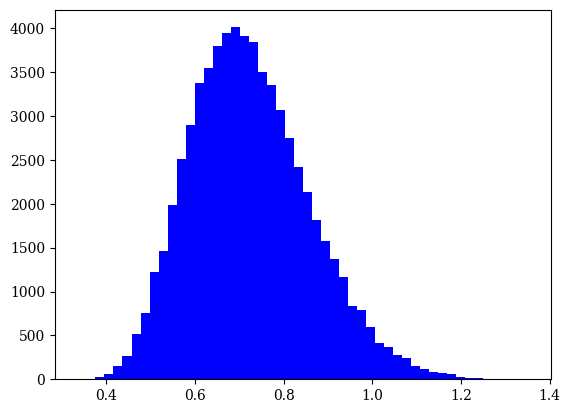

In [165]:
RAWC=[]
RAWCN=[]
for i in range(NThr):
    RawC=RAWA[i]/FFA[i]
    RawCN=(RawC)#-0.99)*100
    RAWC.append(RawC)
    RAWCN.append(RawCN)
k=0
ImG=plt.hist(np.ravel(RAWCN[k]),bins=50,color="blue")

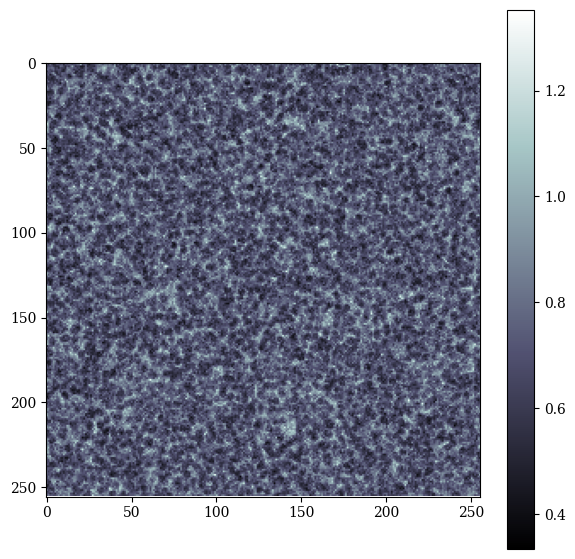

In [166]:
plt.figure(figsize=(7,7))
plt.imshow(RAWCN[k], cmap="bone")
plt.colorbar()

In [167]:
import os
file_name = 'UMPA_data_Poly'
os.makedirs(file_name,exist_ok=True)
np.savetxt(file_name+'/REF/REF_09.txt',RAWCN[k])


In [41]:
SAMP=np.genfromtxt('UMPA_data_Poly/SAMP/SAMP_09.txt')
SAMP.shape

(256, 256)